## Public AI Open API object

In [15]:
with open('AI api.txt', mode = 'r') as key_file :
    ai = key_file.read()

In [16]:
import urllib3
import json
import base64
openApiURL = 'http://aiopen.etri.re.kr:8000/ObjectDetect'

In [27]:
from glob import glob
glob('images/*')

['images/ship.jpg',
 'images/Buildings.jpg',
 'images/cat.jpg',
 'images/peace.jpg']

In [28]:
IMG_FILE = glob('images/*')[2]

In [29]:
import os
img_file = IMG_FILE
_, img_type = os.path.splitext(img_file)
img_type

'.jpg'

In [30]:
img_type = 'jpg' if img_type == '.jfif' else img_type[1:]
img_type

'jpg'

In [31]:
with open(img_file, 'rb') as file :   # read binary
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [33]:
requestJson = {
    "access_key": ai,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [34]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)

In [35]:
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.992995","x":"92","y":"101","width":"2138","height":"1704"}]}}'


In [37]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.992995","x":"92","y":"101","width":"2138","height":"1704"}]}}'

In [38]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.992995',
    'x': '92',
    'y': '101',
    'width': '2138',
    'height': '1704'}]}}

In [39]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.992995',
 'x': '92',
 'y': '101',
 'width': '2138',
 'height': '1704'}

#### Visualization

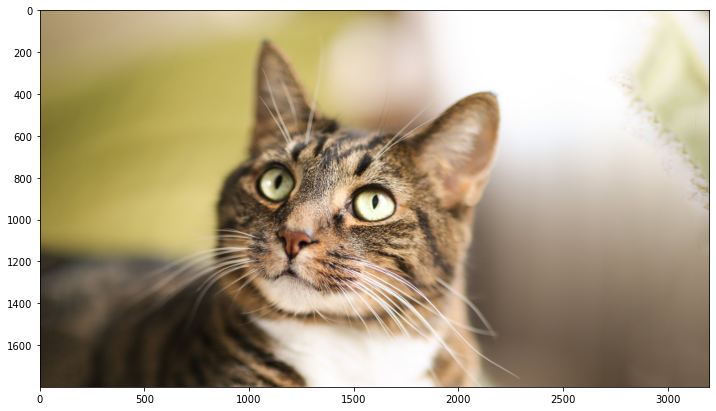

In [52]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [53]:
draw = ImageDraw.Draw(image)

for obj in obj_list :
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x + 100, y + 100), name, font = ImageFont.truetype('AppleGothic', 200), fill = (255, 0, 0))
    draw.rectangle(((x, y), (x + w, y + w)), outline = (255, 0, 0), width = 20)

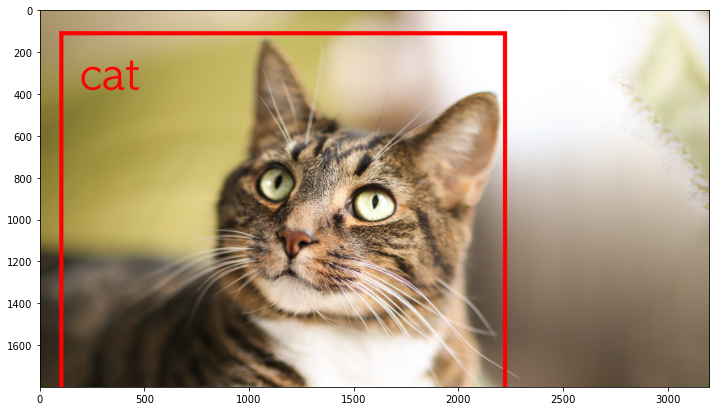

In [54]:
plt.figure(figsize = (12, 8))
plt.imshow(image)
plt.show()

#### Multiple files

In [4]:
from glob import glob
glob('images/*')

['images/ship.jpg',
 'images/Buildings.jpg',
 'images/cat.jpg',
 'images/peace.jpg']

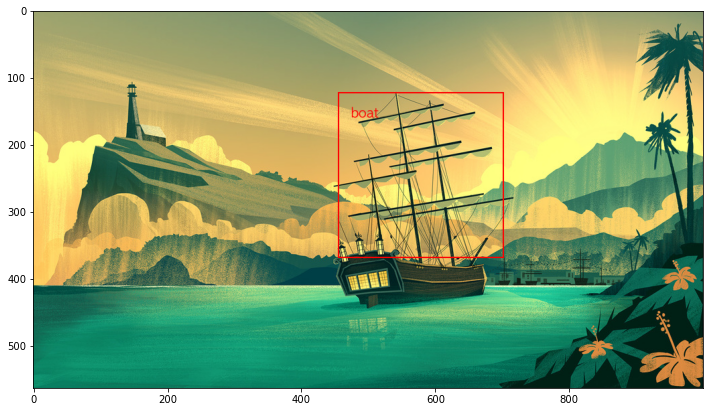

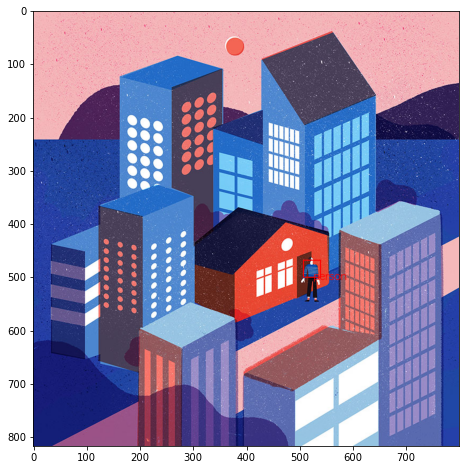

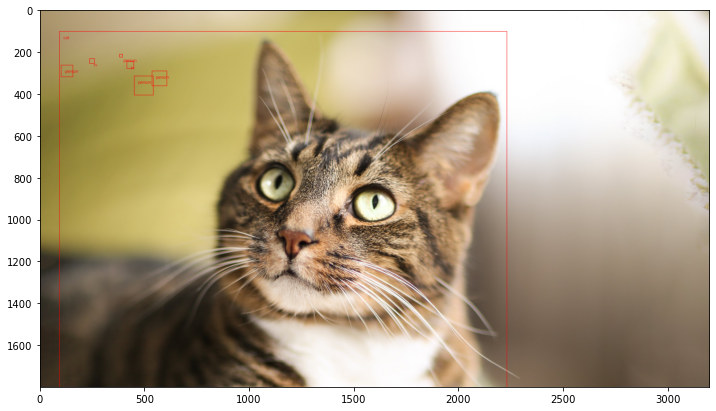

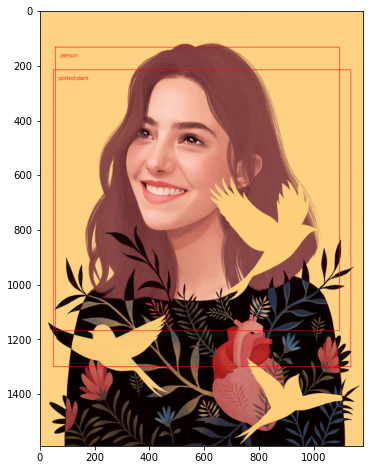

In [56]:
for img_file in glob('images/*') :
    _, img_type = os.path.splitext(img_file)
    img_type = 'jpg' if img_type == '.jfif' else img_type[1:]

    with open(img_file, 'rb') as file :
        img_contents = base64.b64encode(file.read()).decode("utf8")

    requestJson = {
        "access_key": ai,
        "argument": {
            "type": img_type,
            "file": img_contents}
            }

    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(requestJson)
        )

    result = json.loads(response.data)
    obj_list = result['return_object']['data']

    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)
    
    for obj in obj_list :
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x + 20, y + 20), name, font = ImageFont.truetype('AppleGothic', 20), fill = (255, 0, 0))
        draw.rectangle(((x, y), (x + w, y + w)), outline = (255, 0, 0), width = 2)
        draw.rectangle(((x, y), (x + w, y + w)), outline = (255, 0, 0), width = 2)
    
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.show()